In [1]:
import pandas as pd
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.shape, df.dropna().shape

((16719, 16), (6825, 16))

In [4]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Log of Total Sales')

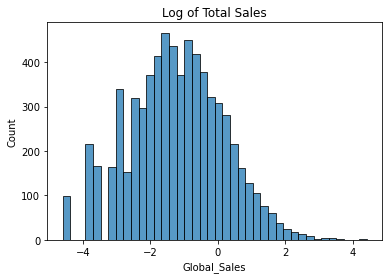

In [5]:
sns.histplot(np.log(df.dropna()['Global_Sales']), bins =40)
plt.title('Log of Total Sales')

In [6]:
df_clean = df.dropna()
df_clean.head()

In [7]:
df_clean.groupby('Platform').mean()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
Platform,,,,,,,,,
3DS,2012.632258,0.314000,0.215032,0.216581,0.049355,0.795032,68.064516,31.993548,102.270968
DC,2000.071429,0.110000,0.020714,0.190000,0.004286,0.325000,87.357143,17.642857,84.500000
DS,2007.370690,0.373707,0.205388,0.180302,0.064353,0.823987,66.523707,23.484914,30.183190
GBA,2003.084388,0.334979,0.137553,0.068059,0.015105,0.555907,70.400844,15.940928,24.156118
GC,2003.316092,0.310144,0.088879,0.046322,0.012270,0.458103,71.204023,21.859195,37.238506
PC,2009.058372,0.097942,0.161014,0.000261,0.027343,0.287435,76.261137,28.717358,699.064516
PS,1999.366667,0.611733,0.430533,0.259000,0.076400,1.377000,73.853333,11.013333,77.246667
PS2,2003.738596,0.414605,0.223807,0.066500,0.124921,0.829798,69.492105,24.750877,46.052632
PS3,2010.091027,0.444239,0.355657,0.070897,0.149298,1.019896,70.953186,34.921977,227.490247


In [ ]:
df_clean.dtypes

In [ ]:
df_clean['Year_of_Release'] = df_clean['Year_of_Release'].astype(object)
df_clean['User_Score'] = df_clean['User_Score'].astype(np.number)
df_clean.isna().sum()

In [ ]:
ohe = OneHotEncoder(handle_unknown='ignore')
sc = StandardScaler()
cs = ColumnTransformer([('norm', sc, ['Critic_Score','Critic_Count','User_Score','User_Count', 'JP_Sales'])])
X = df_clean[['JP_Sales','Platform','Year_of_Release','Genre','Publisher','Critic_Score','Critic_Count','User_Score','User_Count','Developer','Rating']]
y = df_clean['Global_Sales_log']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state= 42)

In [ ]:
X_train = cs.fit_transform(X_train)
X_test = cs.transform(X_test)

X_train = ohe.fit_transform(X_train)
X_test = ohe.transform(X_test)

In [ ]:
r = Ridge()
r.fit(X_train, y_train)
r.score(X_train, y_train),r.score(X_test, y_test),metrics.mean_squared_error(y_test, r.predict(X_test))

In [ ]:
from tensorflow import keras as tf
X_train_d = X_train.todense()
X_test_d = X_test.todense()
model = tf.Sequential([
    tf.layers.Dense(10, input_shape=(X_train_d.shape[1],), activation='relu'),
    
    tf.layers.Dense(28, activation='relu'),
   
    tf.layers.Dense(28, activation='relu'),
    
    tf.layers.Dense(28, activation='relu'),
   
    tf.layers.Dense(10, activation='relu'),
    tf.layers.Dense(1),

])

es = tf.callbacks.EarlyStopping(patience=10,restore_best_weights=True )
model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train_d, y_train, epochs=100, verbose=1, validation_data=(X_test_d, y_test), callbacks=es)

In [ ]:
model.evaluate(X_train_d, y_train), model.evaluate(X_test_d, y_test)